# Analysoinnin perusteet - Projektitehtävä

[Linkki repoon](https://github.com/eeturonkko/analysoinnin_perusteet_2023) tai https://github.com/eeturonkko/analysoinnin_perusteet_2023\
[Data](https://www.kaggle.com/datasets/kapturovalexander/bitcoin-and-other-14-most-significant-cryptos?select=1+Bitcoin.csv) tai https://www.kaggle.com/datasets/kapturovalexander/bitcoin-and-other-14-most-significant-cryptos?select=1+Bitcoin.csv


## Kryptovaluutta - Mitä se on?
Kryptovaluutta on digitaalinen tai virtuaalinen valuutta, joka käyttää kryptografiaa turvallisuuden varmistamiseen. Se on hajautettu ja toimii lohkoketjuteknologian periaatteella. Kryptovaluuttojen kaksi tunnetuinta esimerkkiä ovat Bitcoin ja Ethereum. Projektityössäni keskityn analysoimaan Bitcoinin ja Ethereumin hintakehitystä vuosien aikana.

## Bitcoin
- Bitcoin luotiin vuonna 2009
- Ensimmäinen lohkoketjuun perustuva kryptovaluutta ja sen tarkoitus oli luoda hajautettu, digitaalinen valuutta ilman keskuspankin hallintaa.

## Ethereum
- Ethereum kehitettiin ja julkistettiin vuonna 2015
- Ethereum käyttää lohkoketjuteknologiaa kuten Bitcoin, mutta keskeinen ero on sen kyky toteuttaa älysopimuksia (Smart contarct).

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from IPython.display import display, Markdown

# Asetetaan csv tiedostojen polut
bitcoin_file_path = "./data/1 Bitcoin.csv"
ethereum_file_path = "./data/2 Ethereum.csv"

# Luetaan csv tiedostot ja tallennetaan ne muuttujiin bitcoin_data ja ethereum_data
bitcoin_data = pd.read_csv(bitcoin_file_path)
ethereum_data = pd.read_csv(ethereum_file_path)

# Muutetaan 'Date' sarakkeen tyyppi datetimeksi
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
ethereum_data['Date'] = pd.to_datetime(ethereum_data['Date'])

# Rajataan data vuosille 2023
btc_2023 = bitcoin_data[(bitcoin_data['Date'] >= '2023-01-01') & (bitcoin_data['Date'] <= '2023-12-31')]
eth_2023 = ethereum_data[(ethereum_data['Date'] >= '2023-01-01') & (ethereum_data['Date'] <= '2023-12-31')]


# Asetetaan 'Date' sarakkeen indeksiksi
bitcoin_data.set_index('Date', inplace=True)
btc_2023.set_index('Date', inplace=True)
ethereum_data.set_index('Date', inplace=True)
eth_2023.set_index('Date', inplace=True)




In [169]:
# Selvitä puuttuvat arvot
missing_values_count_btc = bitcoin_data.isnull().sum()
missing_values_count_eth = ethereum_data.isnull().sum()

# Näytä puuttuvat arvot prosentteina
total_cells_btc = np.product(bitcoin_data.shape)
total_cells_eth = np.product(ethereum_data.shape)
total_missing_btc = missing_values_count_btc.sum()
total_missing_eth = missing_values_count_eth.sum()
per_of_missing_data_btc = (total_missing_btc/total_cells_btc) * 100
per_of_missing_data_eth = (total_missing_eth/total_cells_eth) * 100
print("Puuttuvat arvot prosentteina (BTC):",int(per_of_missing_data_btc), "%")
print("Puuttuvat arvot prosentteina (ETH):",int(per_of_missing_data_eth), "%")

# Näytä duplikaatit
bitcoin_duplicates = bitcoin_data.duplicated().sum()
ethereum_duplicates = ethereum_data.duplicated().sum()

print("Duplikaattien määrä (BTC):", bitcoin_duplicates,"kpl")
print("Duplikaattien määrä (ETH):", ethereum_duplicates,"kpl")



Puuttuvat arvot prosentteina (BTC): 0 %
Puuttuvat arvot prosentteina (ETH): 0 %
Duplikaattien määrä (BTC): 0 kpl
Duplikaattien määrä (ETH): 0 kpl


## Bitcoinin ja Ethereumin hintakehitys vuosien aikana


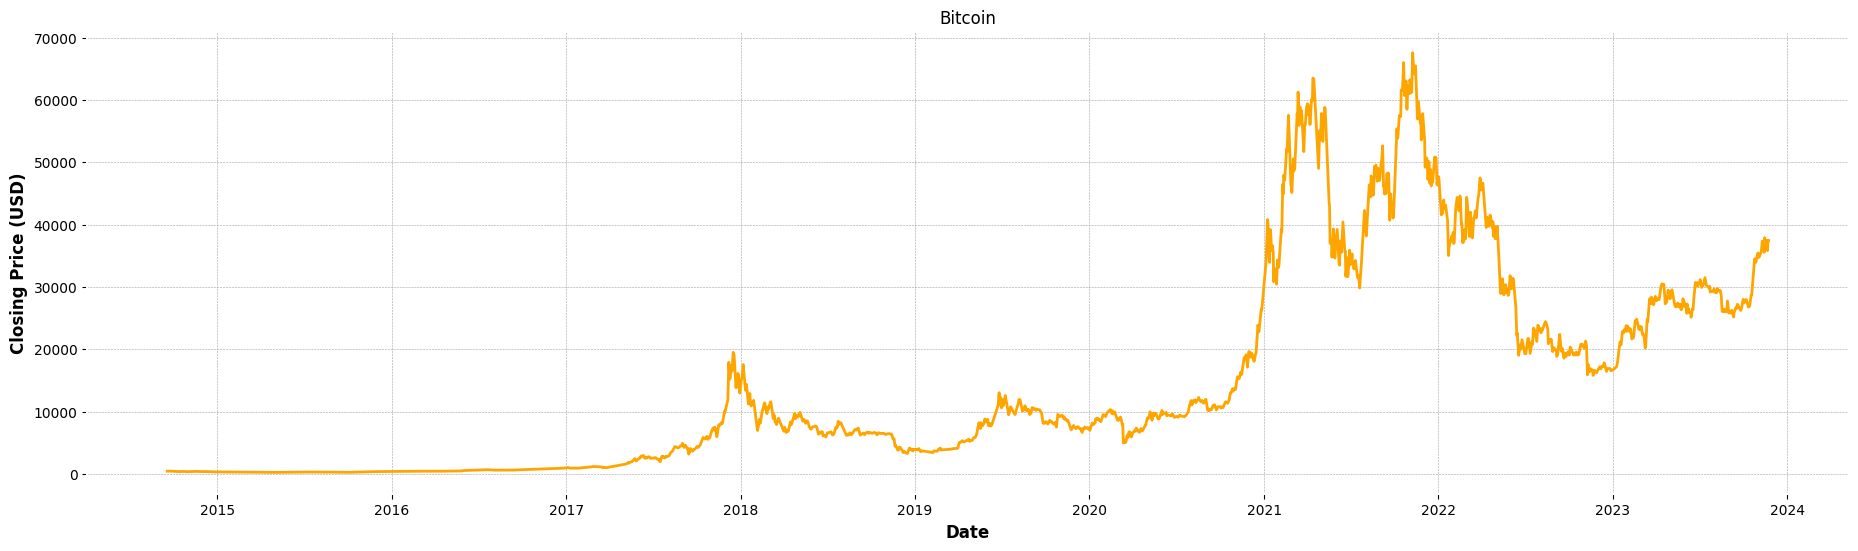

In [170]:

# Bitcoin
plt.figure(figsize=(50, 6))
plt.subplot(1, 2, 1)
plt.plot(bitcoin_data["Close"], label="Bitcoin", color="orange")
plt.title('Bitcoin')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


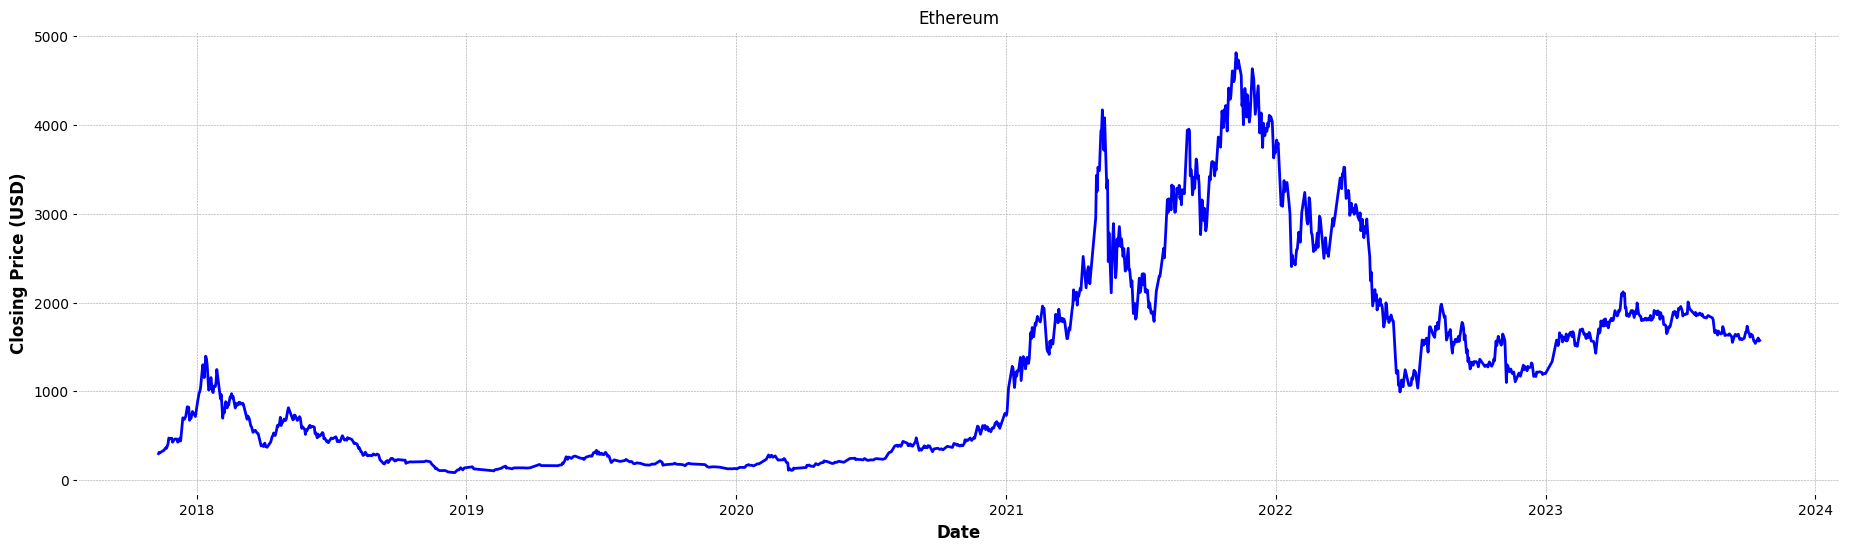

In [171]:
# Ethereum
plt.figure(figsize=(50, 6))
plt.subplot(1, 2, 2)
plt.plot(ethereum_data['Close'], label='Ethereum', color='blue')
plt.title('Ethereum')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

## Vuoden 2023 kurssien kehitys

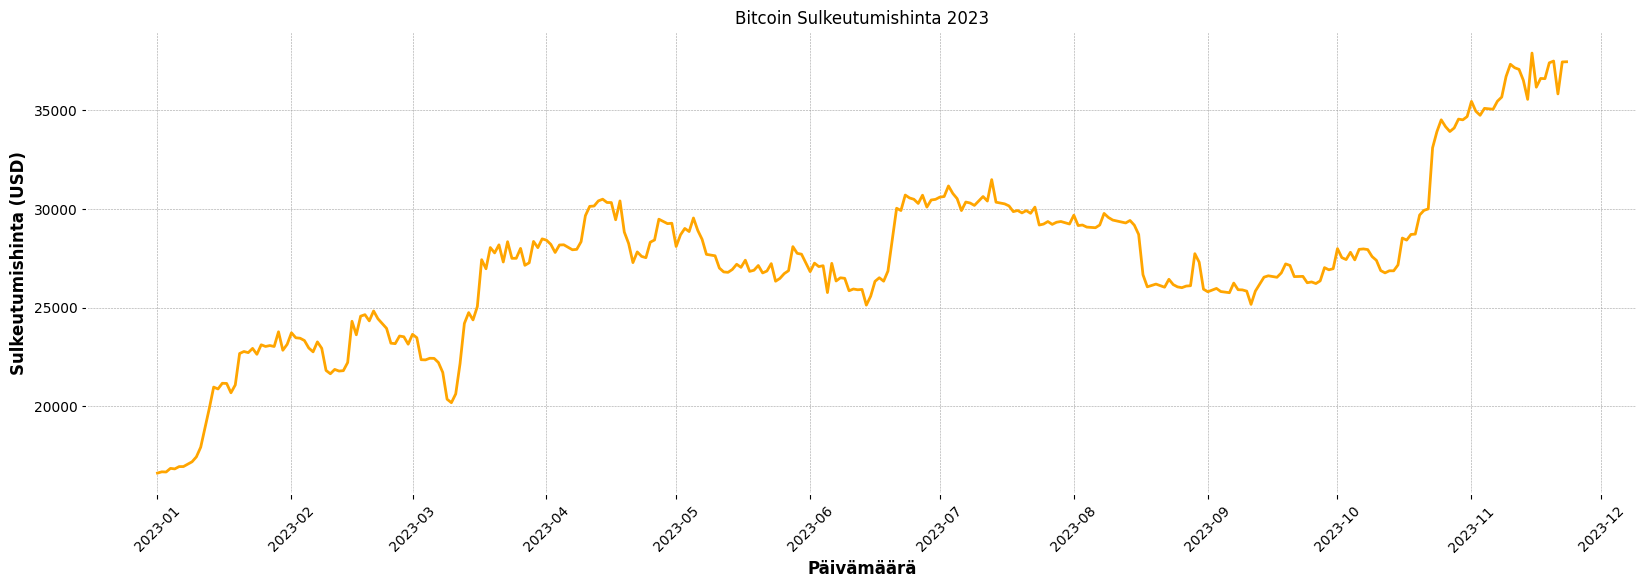

In [172]:
plt.figure(figsize=(20, 6))
plt.plot(btc_2023['Close'], label='Bitcoin', color='orange')
plt.title('Bitcoin Sulkeutumishinta 2023')
plt.xlabel('Päivämäärä')
plt.ylabel('Sulkeutumishinta (USD)')

# Asetetaan x-akselille kuukausittaiset merkinnät
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

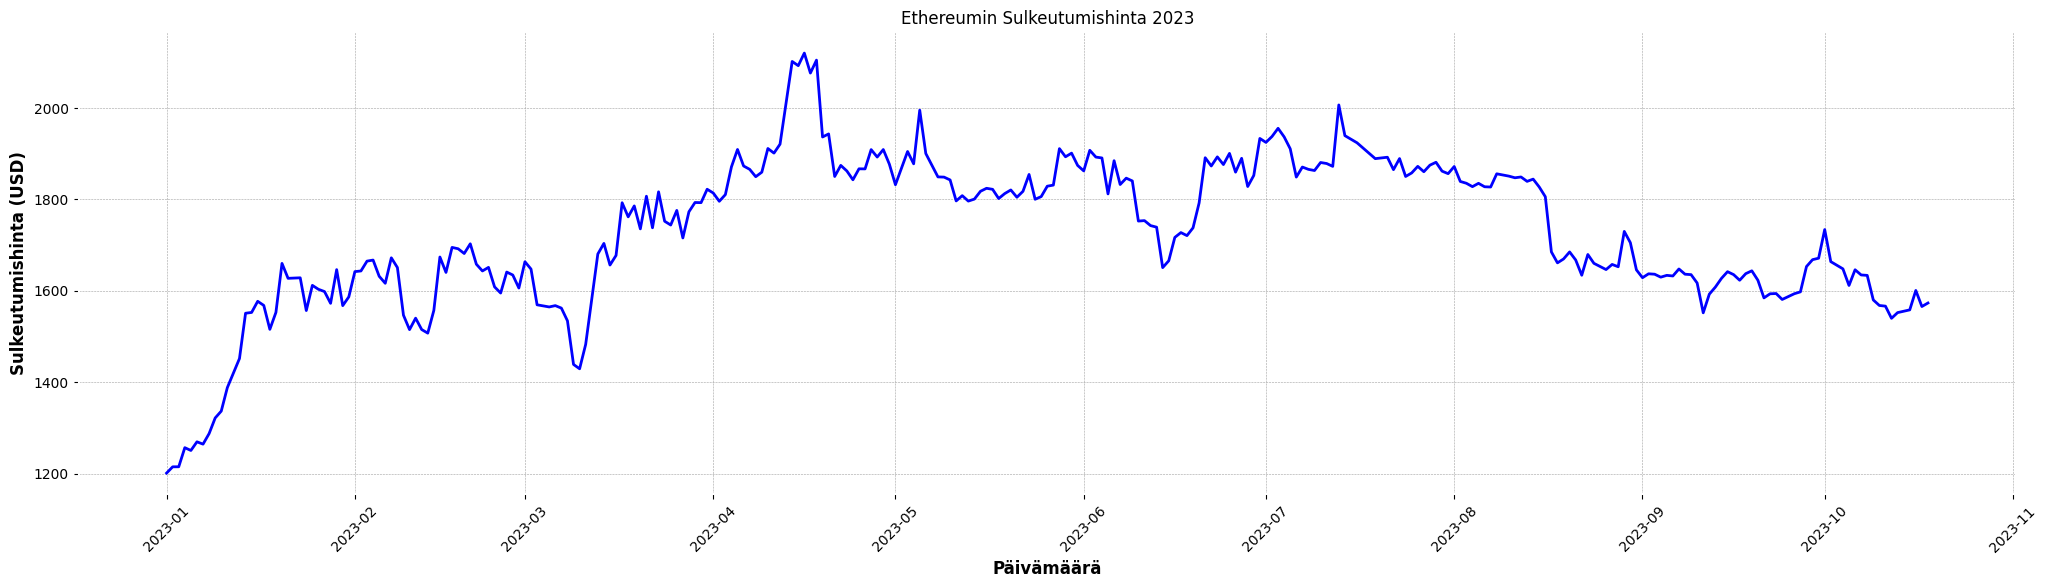

In [173]:
# ETH 2023
plt.figure(figsize=(25, 6))
plt.plot(eth_2023['Close'], label='Ethereum', color='blue')
plt.title('Ethereumin Sulkeutumishinta 2023')
plt.xlabel('Päivämäärä')
plt.ylabel('Sulkeutumishinta (USD)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [174]:
# Lasketaan Bitcoinin hinnan prosentuaalinen muutos vuodelle 2023
start_price_btc_2023 = btc_2023['Close'].iloc[0]
end_price_btc_2023 = btc_2023['Close'].iloc[-1]
percentage_change_btc_2023 = ((end_price_btc_2023 - start_price_btc_2023) / start_price_btc_2023) * 100
pyoristetty_muutos_btc = round(percentage_change_btc_2023, 2)


# Lasketaan Ethereum hinnan prosentuaalinen muutos vuodelle 2023
start_price_eth_2023 = eth_2023['Close'].iloc[0]
end_price_eth_2023 = eth_2023['Close'].iloc[-1]
percentage_change_eth_2023 = ((end_price_eth_2023 - start_price_eth_2023) / start_price_eth_2023) * 100
pyoristetty_muutos_eth = round(percentage_change_eth_2023, 2)


markdown_text = f"""
## Bitcoinin arvo on vuonna 2023 noussut {pyoristetty_muutos_btc}%\n
## Ethereumin arvo on vuonna 2023 noussut {pyoristetty_muutos_eth}%
"""

display(Markdown(markdown_text))


## Bitcoinin arvo on vuonna 2023 noussut 125.21 %

## Ethereumin arvo on vuonna 2023 noussut 30.99 %


## Bitcoin halving

Bitcoin halving (puoliintuminen) on tapahtuma, jossa uusien bitcoinin tarjonta putoaa 50 prosenttia. Ensimmäinen Bitcoin halving tapahtui marraskuussa 2012. Halving on Bitcoinin koodiin ohjelmoitu tapahtuma, joka linkittyy vahvasti louhintaan. 

#### Miten Bitcoin Halving Toimii?

Halving tapahtuu noin neljän vuoden välein. Halving pitää huolta siitä, että bitcoinien liikkeelle laskettu määrä ei koskaan ylitä 21 miljoonaa kappaletta. Seuraava Bitcoin halving nähdään huhtikuussa 2024. Bitcoinin perustamishetkellä (2009) louhijat saivat palkkioiksi peräti 50 bitcoinia per lohko. Lohkopalkkio on puolitettu tämän jälkeen kolme kertaa: 50 BTC -> 25 BTC -> 12,5 BTC -> 6,25 BTC.

#### Aikajana

Yhteensä halving-tapahtumia nähdään 32 kappaletta, jonka jälkeen kaikki 21 miljoonaa bitcoinia on louhittu. Viimeinen halving tapahtuu noin vuonna 2140.

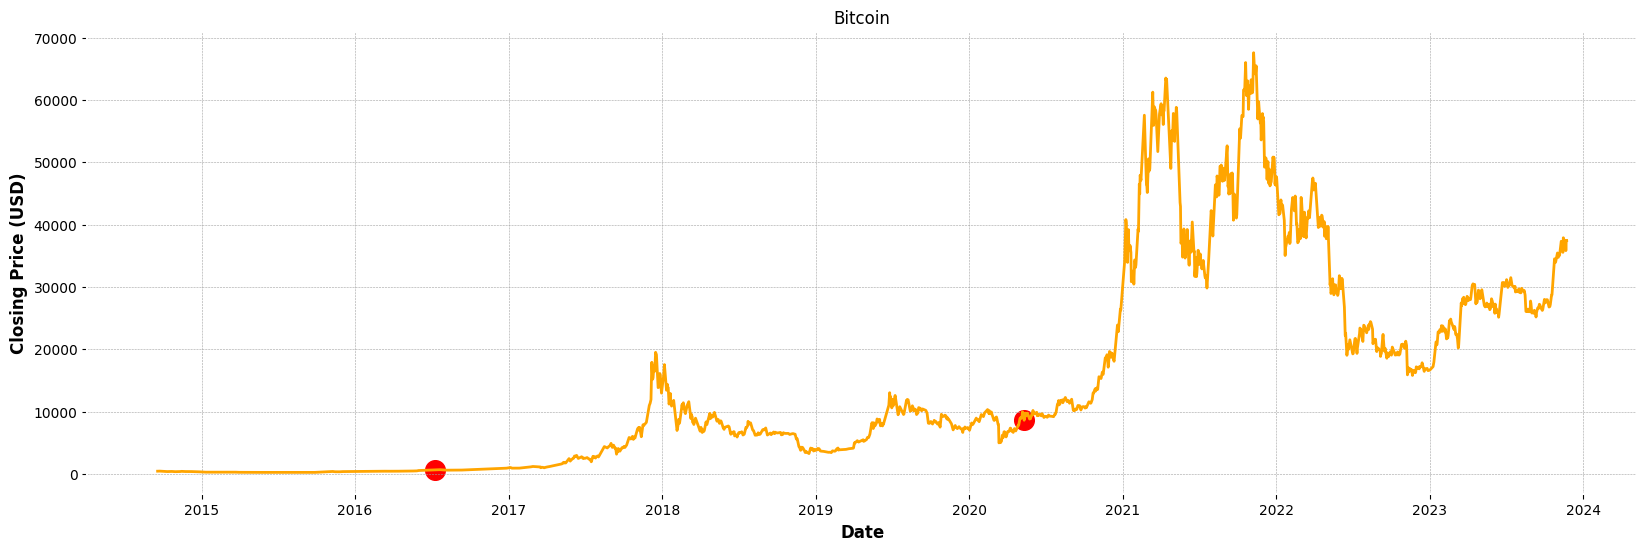

In [175]:
# Määritä halvingin päivämäärät datetime-tyypiksi
halving_dates = [pd.to_datetime('2012-11-28'), pd.to_datetime('2016-07-09'), pd.to_datetime('2020-05-11')]

# Bitcoinin hintakehityksen kaavio
plt.figure(figsize=(20, 6))
plt.plot(bitcoin_data['Close'], label='Bitcoin', color='orange')

# Lisää ympyrät halvingin päivämäärille
for date in halving_dates:
    if date in bitcoin_data.index:
        plt.scatter(date, bitcoin_data.loc[date, 'Close'], color='red', s=200)  # s määrittää ympyrän koon

plt.title('Bitcoin')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

## Halvingin vaikutukset Bitcoinin hintaan

Bitcoin-halvingilla on merkittäviä vaikutuksia koko Bitcoinin hintaan. Halvingit ovat yksi puhutuimmista tapahtumista kryptovaluuttojen maailmassa.

On tärkeää muistaa että historiallinen kehitys **_ei ole tae tulevasta_**, mutta Bitcoinin kurssi on tehnyt merkittäviä liikkeitä edellisten puoliintumisten jälkeen kuten:

- Vuoden 2016 halvingia seurasi valtava kryptovaluuttabuumi vuonna 2017
- Vuoden 2020 halvingin jälkeen nähtiin merkittävä nousumarkkina vuonna 2021

## Vuodet 2024 - 2025

Vaikka Bitcoin on käyttäytynyt tietyllä tavoin historiassa, kurssikehitys voi olla täysin erilaista tulevaisuudessa. Bitcoin on muuttunut valtavasti sijoitusluokkana sen alkuvuosista.
- Bitcoinin markkina-arvo on nyt merkittävästi korkeampi kuin aiempien halvingien aikaan, mikä tekee kurssin noususta vaikeampaa.
- Bitcoinin kursseja on ohjannut viime vuosina keskuspankkien toiminta ja osakemarkkinan liikkeet.

Halving tapahtuu, kun Bitcoinin lohkoketjuun on louhittu lohko numero 840.000. Vuoden 2024 puoliintumisessa lohkopalkkio pienenee 6,25 bitcoinista 3,125 bitcoiniin.

Vuonna 2024 nähdään todennäköisesti keskuspankkien siirtyminen kohti löysempää rahapolitiikkaa. Ohjauskorot kääntyvät laskuun, ja globaali likviditeetti alkaa kasvaa.  Todennäköisesti muutos nähdään -24 loppupuolella. Tämä johtaisi **_todennäköisesti_** nousuun myös Bitcoinin kurssissa.